In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st

%matplotlib inline
pd.set_option('display.max_columns', None)


In [2]:
# Dataset 1: df_final_demo
file_1 = "https://raw.githubusercontent.com/camilla-scandola/ab-testing-project/refs/heads/main/df_final_demo.txt"
df1 = pd.read_csv(file_1)
df1.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0


In [3]:
# Convert to number M=1, F=0

df1['gendr_num'] = df1['gendr'].map({'M': 1, 'F': 0})
df1.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,gendr_num
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,NaN
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,NaN
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,NaN
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,1.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,0.0


In [4]:
nulls_per_column1= df1.isnull().sum()
print(nulls_per_column1)

client_id               0
clnt_tenure_yr         14
clnt_tenure_mnth       14
clnt_age               15
gendr                  14
num_accts              14
bal                    14
calls_6_mnth           14
logons_6_mnth          14
gendr_num           24139
dtype: int64


In [5]:
# Dataset 2: df_final_experiment_clients
file_2 = "https://raw.githubusercontent.com/camilla-scandola/ab-testing-project/refs/heads/main/df_final_experiment_clients.txt"
df2 = pd.read_csv(file_2)
df2.head()

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control


In [6]:
nulls_per_column2= df2.isnull().sum()
print(nulls_per_column2)

client_id        0
Variation    20109
dtype: int64


In [7]:
# Dataset 3: df_final_web_data_pt_1 and 2 merged
file_3 = "https://raw.githubusercontent.com/camilla-scandola/ab-testing-project/refs/heads/main/df_final_web_data_combined.csv"
df3 = pd.read_csv(file_3)
df3.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


In [8]:
nulls_per_column3 = df3.isnull().sum()
print(nulls_per_column3)

client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64


MERGED

In [9]:
df_experiment_clean = df2.dropna() #DROPS CLIEN ID WITH NO A/B TEST DATA (NON CONTROL NON TEST)

In [10]:
df_merge1 = df_experiment_clean.merge(
    df3,
    on='client_id',
    how='right'
)

In [11]:
df_final = df_merge1.merge(
    df1,
    on='client_id',
    how='left'
)

In [12]:
#df_final = df_final["Variation"].dropna() #DROPS CLIEN ID WITH NO A/B TEST DATA (NON CONTROL NON TEST)

In [13]:
df_final.head()

,client_id,Variation,visitor_id,visit_id,process_step,date_time,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,gendr_num
0,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,NaN
1,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,NaN
2,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,NaN
3,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,NaN
4,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,NaN


In [14]:
#Save CSV file

df_final.to_csv(
    r"C:\Users\MartínPazYáñez\Downloads\df_final.csv",
    index=False,
    encoding="utf-8"
)



In [15]:
print(df_final.isnull().sum())

client_id                0
Variation           434096
visitor_id               0
visit_id                 0
process_step             0
date_time                0
clnt_tenure_yr      305689
clnt_tenure_mnth    305689
clnt_age            305701
gendr               305689
num_accts           305689
bal                 305689
calls_6_mnth        305689
logons_6_mnth       305689
gendr_num           457311
dtype: int64


TEST TO CONFIRM CORRECT DATA SET MERGE

In [16]:
df_final[df_final["client_id"] == 836976]

,client_id,Variation,visitor_id,visit_id,process_step,date_time,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,gendr_num
177935,836976,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:51:13,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,NaN
177936,836976,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:47:50,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,NaN
177937,836976,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:46:45,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,NaN
177938,836976,Test,427070339_1413275162,228976764_46825473280_96584,step_3,2017-04-02 11:23:08,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,NaN
177939,836976,Test,427070339_1413275162,228976764_46825473280_96584,step_2,2017-04-02 11:22:24,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,NaN
177940,836976,Test,427070339_1413275162,228976764_46825473280_96584,step_1,2017-04-02 11:21:38,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,NaN
177941,836976,Test,427070339_1413275162,228976764_46825473280_96584,start,2017-04-02 11:21:28,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,NaN
178027,836976,Test,427070339_1413275162,104438405_2368283624_817211,start,2017-03-29 11:02:44,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,NaN
178028,836976,Test,427070339_1413275162,104438405_2368283624_817211,start,2017-03-29 11:01:40,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,NaN
178029,836976,Test,427070339_1413275162,104438405_2368283624_817211,start,2017-03-29 10:59:43,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,NaN


EXPLORE DATA (PROCESS)

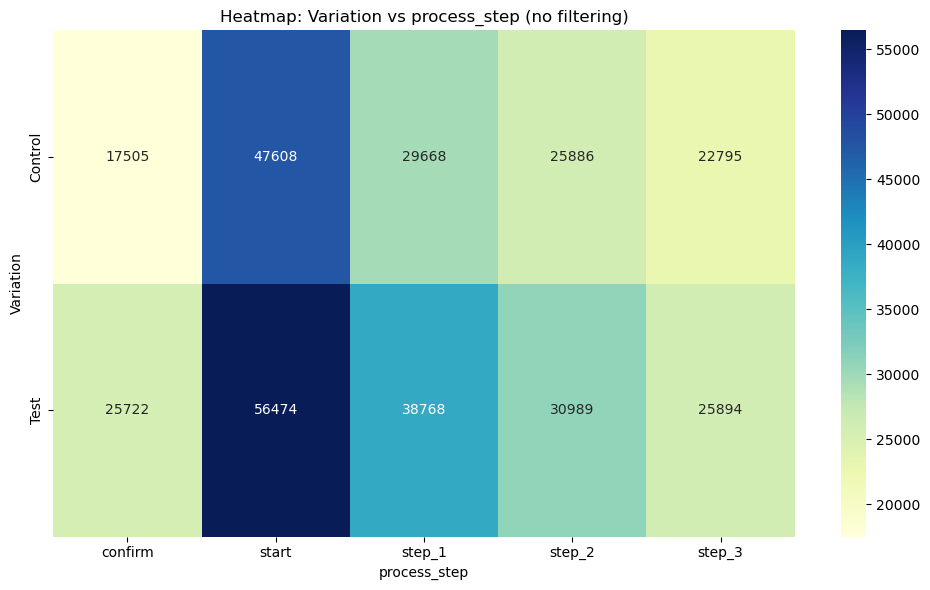

In [17]:
# Create full crosstab (no filtering applied)
crosstab_result = pd.crosstab(df_final["Variation"], df_final["process_step"])

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(crosstab_result, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Heatmap: Variation vs process_step (no filtering)")
plt.xlabel("process_step")
plt.ylabel("Variation")
plt.tight_layout()
plt.show()

Variation
test       25722
control    17505
Name: count, dtype: int64


/var/folders/mg/bhcm044157v8jjlw0q70h74w0000gn/T/ipykernel_95857/3414713871.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=confirm_df, x="Variation", palette=variant_colors,)


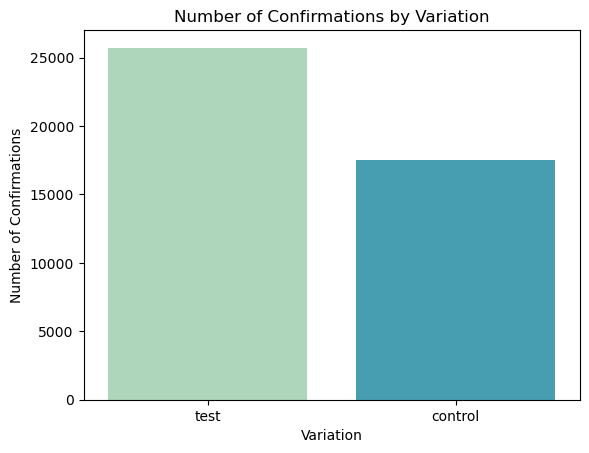

In [65]:
confirm_df = df_final[df_final["process_step"] == "confirm"]

variant_colors = {"control": "#36A9C3", "test": "#A6DDB7"}

confirm_counts = confirm_df["Variation"].value_counts()
print(confirm_counts)

sns.countplot(data=confirm_df, x="Variation", palette=variant_colors,)
plt.title("Number of Confirmations by Variation")
plt.xlabel("Variation")
plt.ylabel("Number of Confirmations")
plt.show()

In [19]:
sns.histplot(df_final['clnt_age'], kde=True, bins=30, color="skyblue")

<Axes: xlabel='clnt_age', ylabel='Count'>

In [20]:
sns.boxplot(data=df_final, x='gendr', y='clnt_age', palette='pastel')

/var/folders/mg/bhcm044157v8jjlw0q70h74w0000gn/T/ipykernel_95857/1251205601.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_final, x='gendr', y='clnt_age', palette='pastel')


<Axes: xlabel='clnt_age', ylabel='Count'>

In [21]:
sns.violinplot(data=df_final, x='gendr', y='clnt_age', palette='muted', inner='quartile')

/var/folders/mg/bhcm044157v8jjlw0q70h74w0000gn/T/ipykernel_95857/750270994.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_final, x='gendr', y='clnt_age', palette='muted', inner='quartile')


<Axes: xlabel='clnt_age', ylabel='Count'>

IDENTIFIED USERS WITH INCORRECT STEPS ORDER

In [66]:
# Define the expected order
expected_order = ["start", "step_1", "step_2", "step_3", "confirm"]

# Sort by client and time to ensure chronological order
df_sorted = df_final.sort_values(by=["client_id", "date_time"])

# Function to check sequence validity for one client
def is_sequence_valid(steps):
    # Keep only known steps
    filtered_steps = [s for s in steps if s in expected_order]
    # Convert each step to its numeric order
    numeric_steps = [expected_order.index(s) for s in filtered_steps]
    # Check if they never decrease (no backtracking)
    return all(x <= y for x, y in zip(numeric_steps, numeric_steps[1:]))

# Apply to all clients
validity = df_sorted.groupby("client_id")["process_step"].apply(is_sequence_valid)

# Extract invalid client IDs
invalid_clients = validity[~validity].index

# Add a flag column for invalid sequences
df_sorted["invalid_sequence"] = df_sorted["client_id"].isin(invalid_clients)

# Check how many clients are invalid
print(f"Number of clients with invalid step sequence: {len(invalid_clients)}")

# Preview invalid clients’ steps
df_invalid = df_sorted[df_sorted["invalid_sequence"] == True]
df_invalid.head(5)

Number of clients with invalid step sequence: 42464


,client_id,Variation,visitor_id,visit_id,process_step,date_time,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,gendr_num,completed,invalid_sequence
245500,722,NaN,919259913_64837298108,984487154_55831795985_521110,start,2017-04-19 14:50:10,11.0,143.0,59.5,F,2.0,22466.17,1.0,1.0,0.0,0,True
245499,722,NaN,919259913_64837298108,984487154_55831795985_521110,step_1,2017-04-19 14:50:20,11.0,143.0,59.5,F,2.0,22466.17,1.0,1.0,0.0,0,True
245498,722,NaN,919259913_64837298108,984487154_55831795985_521110,step_2,2017-04-19 14:50:56,11.0,143.0,59.5,F,2.0,22466.17,1.0,1.0,0.0,0,True
245497,722,NaN,919259913_64837298108,984487154_55831795985_521110,step_1,2017-04-19 14:51:12,11.0,143.0,59.5,F,2.0,22466.17,1.0,1.0,0.0,0,True
245496,722,NaN,919259913_64837298108,984487154_55831795985_521110,start,2017-04-19 14:56:16,11.0,143.0,59.5,F,2.0,22466.17,1.0,1.0,0.0,0,True


In [24]:
df_sorted["invalid_sequence"] = df_sorted["client_id"].isin(invalid_clients)
# Count total clients per variation
total_clients = df_sorted.groupby("Variation")["client_id"].nunique()

# Count invalid clients per variation
invalid_clients_by_var = df_sorted[df_sorted["invalid_sequence"]].groupby("Variation")["client_id"].nunique()

# Combine into a single DataFrame
summary = pd.concat([total_clients, invalid_clients_by_var], axis=1)
summary.columns = ["total_clients", "invalid_clients"]

# Fill missing values (in case a group has 0 invalids)
summary = summary.fillna(0)

# Add % of invalid clients
summary["percent_invalid"] = (summary["invalid_clients"] / summary["total_clients"]) * 100

summary

,total_clients,invalid_clients,percent_invalid
Variation,,,
Control,23532,8099,34.416964
Test,26968,10199,37.818896


/var/folders/mg/bhcm044157v8jjlw0q70h74w0000gn/T/ipykernel_95857/2151770394.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary.reset_index(), x="Variation", y="percent_invalid", palette="Set2")


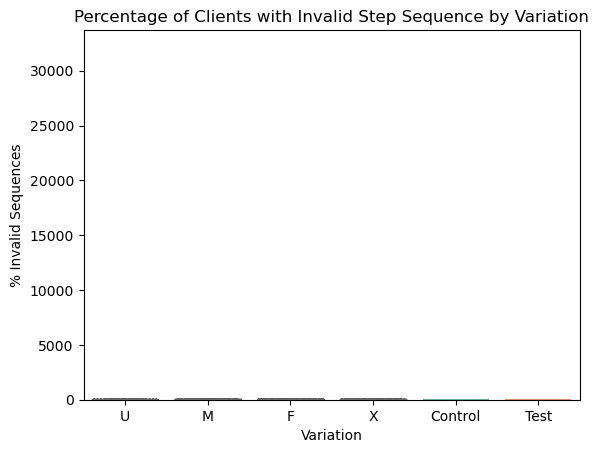

In [25]:
sns.barplot(data=summary.reset_index(), x="Variation", y="percent_invalid", palette="Set2")
plt.title("Percentage of Clients with Invalid Step Sequence by Variation")
plt.ylabel("% Invalid Sequences")
plt.xlabel("Variation")
plt.show()

A/B TEST VARIATION ANALYSIS

In [26]:
df_final["Variation"].value_counts() #Number of tests

Variation
Test       177847
Control    143462
Name: count, dtype: int64

In [27]:
confirm_df = df_final[df_final["process_step"] == "confirm"]

confirm_counts = confirm_df["Variation"].value_counts()
print(confirm_counts) #Total Confirmations by type of tests

Variation
Test       25722
Control    17505
Name: count, dtype: int64


Save totals of variants +  confirmations by variant

In [28]:
# Total coun per TEST / CONTROL
counts = df_final["Variation"].value_counts()

n_test = counts["Test"]
n_control = counts["Control"]

print(n_test, n_control)

177847 143462


In [29]:
# Confirms per user (TEST/CONTROL) value counts
confirm_counts = df_final[df_final["process_step"] == "confirm"]["Variation"].value_counts()

x_test = confirm_counts["Test"]
x_control = confirm_counts["Control"]

print(x_test, x_control)

25722 17505


Conversion rates

In [30]:
p_test = x_test / n_test
p_control = x_control / n_control

print("p_test:", p_test)
print("p_control:", p_control)


p_test: 0.1446299347191687
p_control: 0.12201837420362187


T test

In [31]:
alpha = 0.05

In [32]:
df_control = df_final[(df_final["Variation"] == "Control") & (df_final["process_step"] == "confirm")]["Variation"]
df_test = df_final[(df_final["Variation"] == "Test") & (df_final["process_step"] == "confirm")]["Variation"]

In [33]:
#st.ttest_ind(df_control,df_test, equal_var=False)

In [34]:
print(df_control.dtype)
print(df_test.dtype)
print(df_control.head())
print(df_test.head())

object
object
13    Control
14    Control
15    Control
42    Control
56    Control
Name: Variation, dtype: object
8     Test
24    Test
37    Test
49    Test
67    Test
Name: Variation, dtype: object


### Did the Test Variation Significantly Impact the Conversion Rate?

In [35]:
# Create binary variable
df_final['completed'] = (df_final['process_step'] == 'confirm').astype(int)

# Filter groups
df_control = df_final[df_final['Variation'] == 'Control']['completed']
df_test = df_final[df_final['Variation'] == 'Test']['completed']

# T-test
t_stat, p_value = st.ttest_ind(df_control, df_test, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.50f}")

if p_value < 0.05:
    print("\n✓ The difference IS statistically significant")
else:
    print("\n✗ The difference is NOT statistically significant")

T-statistic: -18.8275
P-value: 0.00000000000000000000000000000000000000000000000000

✓ The difference IS statistically significant


TEST IS WINNER REGARDING CONFIRMATION AND STADISTICALLY SIGNIFICANT

In [36]:
print(f"Control completion rate: {df_control.mean():.2%}")
print(f"Test completion rate: {df_test.mean():.2%}")
print(f"Difference: {(df_test.mean() - df_control.mean()):.2%}")

Control completion rate: 12.20%
Test completion rate: 14.46%
Difference: 2.26%


In [37]:
print(f"P-value: {p_value}")  # Notación científica
print(f"P-value: {p_value:.2e}")  # Formato científico explícito

P-value: 4.9685631558678775e-79
P-value: 4.97e-79


P num is 0.0000000000000000000000000000000000000000000000000000000000000000000000000000497

In [38]:
#RELATIVE INCREASE

control_rate = df_control.mean()  # 0.1220
test_rate = df_test.mean()        # 0.1446
absolute_diff = test_rate - control_rate  # 0.0226

relative_increase = (absolute_diff / control_rate) * 100
# = (0.0226 / 0.1220) * 100
# = 18.5%

print(f"Relative increase: {relative_increase:.1f}%")

Relative increase: 18.5%


### Does the Test Variation Attract a Different Age Demographic?

In [39]:
# Filter users who completed (reached 'confirm' step)
df_completed = df_final[df_final['process_step'] == 'confirm']

# Separate by variation
df_control_age = df_completed[df_completed['Variation'] == 'Control']['clnt_age']
df_test_age = df_completed[df_completed['Variation'] == 'Test']['clnt_age']

# Remove any NaN values
df_control_age = df_control_age.dropna()
df_test_age = df_test_age.dropna()

# Descriptive statistics
print("=== AGE ANALYSIS FOR USERS WHO COMPLETED ===\n")
print(f"Control - Users who completed: {len(df_control_age):,}")
print(f"Control - Mean age: {df_control_age.mean():.2f} years")
print(f"Control - Std dev: {df_control_age.std():.2f}")

print(f"\nTest - Users who completed: {len(df_test_age):,}")
print(f"Test - Mean age: {df_test_age.mean():.2f} years")
print(f"Test - Std dev: {df_test_age.std():.2f}")

print(f"\nDifference in mean age: {df_test_age.mean() - df_control_age.mean():.2f} years")

# T-test
t_stat, p_value = st.ttest_ind(df_control_age, df_test_age, equal_var=False)

print(f"\n=== T-TEST RESULTS ===")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.6f}")

if p_value < 0.05:
    print("\n✓ The difference IS statistically significant (p < 0.05)")
    print("  → The Test design attracts a different age profile")
else:
    print("\n✗ The difference is NOT statistically significant (p >= 0.05)")
    print("  → Both designs attract similar age profiles")

=== AGE ANALYSIS FOR USERS WHO COMPLETED ===

Control - Users who completed: 17,498
Control - Mean age: 47.77 years
Control - Std dev: 15.33

Test - Users who completed: 25,716
Test - Mean age: 48.01 years
Test - Std dev: 15.76

Difference in mean age: 0.24 years

=== T-TEST RESULTS ===
T-statistic: -1.5636
P-value: 0.117929

✗ The difference is NOT statistically significant (p >= 0.05)
  → Both designs attract similar age profiles


### DEPRECATED T - TEST DURATION (SAME BELOW)

In [40]:
"""

# Convert date column to datetime
df_final["date_time"] = pd.to_datetime(df_final["date_time"])

# Clean Variation column
df_final["Variation"] = df_final["Variation"].str.lower().str.strip()

# Sort rows
df_final = df_final.sort_values(["visit_id", "date_time"])

# Get first start and confirm per visit
start = (
    df_final[df_final["process_step"] == "start"]
    .groupby(["visit_id", "Variation"])["date_time"]
    .min()
)

confirm = (
    df_final[df_final["process_step"] == "confirm"]
    .groupby(["visit_id", "Variation"])["date_time"]
    .min()
)

# Keep only visits with both start and confirm
time_df = pd.concat([start, confirm], axis=1, keys=["start", "confirm"]).dropna()

# Compute time difference in minutes
time_df["duration_min"] = (time_df["confirm"] - time_df["start"]).dt.total_seconds() / 60
time_df = time_df.reset_index()

# Split groups
control = time_df[time_df["Variation"] == "control"]["duration_min"]
test = time_df[time_df["Variation"] == "test"]["duration_min"]

# Print results
print("Control mean time (min):", control.mean())
print("Test mean time (min):   ", test.mean())

# T-test
from scipy.stats import ttest_ind
t, p = ttest_ind(test, control, equal_var=False)
print("t-stat:", t)
print("p-value:", p) """


'\n\n# Convert date column to datetime\ndf_final["date_time"] = pd.to_datetime(df_final["date_time"])\n\n# Clean Variation column\ndf_final["Variation"] = df_final["Variation"].str.lower().str.strip()\n\n# Sort rows\ndf_final = df_final.sort_values(["visit_id", "date_time"])\n\n# Get first start and confirm per visit\nstart = (\n    df_final[df_final["process_step"] == "start"]\n    .groupby(["visit_id", "Variation"])["date_time"]\n    .min()\n)\n\nconfirm = (\n    df_final[df_final["process_step"] == "confirm"]\n    .groupby(["visit_id", "Variation"])["date_time"]\n    .min()\n)\n\n# Keep only visits with both start and confirm\ntime_df = pd.concat([start, confirm], axis=1, keys=["start", "confirm"]).dropna()\n\n# Compute time difference in minutes\ntime_df["duration_min"] = (time_df["confirm"] - time_df["start"]).dt.total_seconds() / 60\ntime_df = time_df.reset_index()\n\n# Split groups\ncontrol = time_df[time_df["Variation"] == "control"]["duration_min"]\ntest = time_df[time_df["Var

### T-test “Is there a statistically significant difference in mean tenure between the Control group and the Test group among users who reached the ‘confirm’ step

In [41]:
import scipy.stats as st

# Filter users who completed (reached 'confirm' step)
df_completed = df_final[df_final['process_step'] == 'confirm'].copy()

TENURE_COL = 'clnt_tenure_mnth'

# Separate by variation (labels are lowercase: 'control' and 'test')
df_control_tenure = df_completed[df_completed['Variation'] == 'control'][TENURE_COL]
df_test_tenure    = df_completed[df_completed['Variation'] == 'test'][TENURE_COL]

# Remove any NaN values
df_control_tenure = df_control_tenure.dropna()
df_test_tenure    = df_test_tenure.dropna()

# Descriptive statistics
print("=== TENURE (MONTHS) ANALYSIS FOR USERS WHO COMPLETED ===\n")
print(f"Control - Users who completed: {len(df_control_tenure):,}")
print(f"Control - Mean tenure: {df_control_tenure.mean():.2f} months")
print(f"Control - Std dev: {df_control_tenure.std():.2f}")

print(f"\nTest - Users who completed: {len(df_test_tenure):,}")
print(f"Test - Mean tenure: {df_test_tenure.mean():.2f} months")
print(f"Test - Std dev: {df_test_tenure.std():.2f}")

print(f"\nDifference in mean tenure: {df_test_tenure.mean() - df_control_tenure.mean():.2f} months")

# T-test (Welch, unequal variances)
t_stat, p_value = st.ttest_ind(df_control_tenure, df_test_tenure, equal_var=False)

print(f"\n=== T-TEST RESULTS ===")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.6f}")

if p_value < 0.05:
    print("\n✓ The difference IS statistically significant (p < 0.05)")
    print("  → The Test variant attracts users with significantly different tenure (in months)")
else:
    print("\n✗ The difference is NOT statistically significant (p >= 0.05)")
    print("  → Both variants attract users with similar tenure (in months)")


=== TENURE (MONTHS) ANALYSIS FOR USERS WHO COMPLETED ===

Control - Users who completed: 0
Control - Mean tenure: nan months
Control - Std dev: nan

Test - Users who completed: 0
Test - Mean tenure: nan months
Test - Std dev: nan

Difference in mean tenure: nan months

=== T-TEST RESULTS ===
T-statistic: nan
P-value: nan

✗ The difference is NOT statistically significant (p >= 0.05)
  → Both variants attract users with similar tenure (in months)


/opt/anaconda3/lib/python3.13/site-packages/scipy/_lib/deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


### Does the Test variant convert users faster than the Control?


In [42]:
# Convert timestamps to datetime format
df_final["date_time"] = pd.to_datetime(df_final["date_time"])

# Standardize Variation column
df_final["Variation"] = df_final["Variation"].str.lower().str.strip()

# Sort events chronologically within each visit
df_final = df_final.sort_values(["visit_id", "date_time"])

# ---------------------------------------------------------
# Extract the first "start" timestamp per visit/variant
# ---------------------------------------------------------
start = (
    df_final[df_final["process_step"] == "start"]
    .groupby(["visit_id", "Variation"])["date_time"]
    .min()
)

# ---------------------------------------------------------
# Extract the first "confirm" timestamp per visit/variant
# ---------------------------------------------------------
confirm = (
    df_final[df_final["process_step"] == "confirm"]
    .groupby(["visit_id", "Variation"])["date_time"]
    .min()
)

# ---------------------------------------------------------
# Keep only visits that have BOTH events: start and confirm
# ---------------------------------------------------------
time_df = pd.concat([start, confirm], axis=1, keys=["start", "confirm"]).dropna()
time_df = time_df.reset_index()

# Compute total duration between events (in minutes)
time_df["duration_min"] = (
    (time_df["confirm"] - time_df["start"]).dt.total_seconds() / 60
)

# ---------------------------------------------------------
# Split into Control vs. Test groups
# ---------------------------------------------------------
control = time_df[time_df["Variation"] == "control"]["duration_min"]
test    = time_df[time_df["Variation"] == "test"]["duration_min"]

# Descriptive statistics
control_n   = control.shape[0]
test_n      = test.shape[0]

control_mean = control.mean()
test_mean    = test.mean()

control_std  = control.std()
test_std     = test.std()

# Difference in means
mean_diff = test_mean - control_mean

# ---------------------------------------------------------
# Welch's T-test
# ---------------------------------------------------------
from scipy.stats import ttest_ind

t_stat, p_val = ttest_ind(test, control, equal_var=False)

# ---------------------------------------------------------
# FORMATTED CONCLUSION
# ---------------------------------------------------------
print("=== TIME TO CONVERSION (minutes) — USERS WHO COMPLETED ===\n")

print(f"Control - Completed users: {control_n:,}")
print(f"Control - Mean duration:   {control_mean:.2f} min")
print(f"Control - Std dev:         {control_std:.2f}\n")

print(f"Test - Completed users:    {test_n:,}")
print(f"Test - Mean duration:      {test_mean:.2f} min")
print(f"Test - Std dev:            {test_std:.2f}\n")

print(f"Difference in mean duration (Test – Control): {mean_diff:.2f} min\n")

print("=== T-TEST RESULTS ===")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value:     {p_val:.6f}\n")

# Interpretation logic
if p_val < 0.05:
    print("✔ The difference IS statistically significant (p < 0.05)")
    
    if mean_diff < 0:
        print("  → Users in the Test group complete the process FASTER.")
    else:
        print("  → Users in the Test group take LONGER to complete the process.")
else:
    print("✗ The difference is NOT statistically significant (p >= 0.05)")
    print("  → Both variants lead users to complete the process in similar time.")


=== TIME TO CONVERSION (minutes) — USERS WHO COMPLETED ===

Control - Completed users: 14,902
Control - Mean duration:   6.51 min
Control - Std dev:         7.05

Test - Completed users:    17,907
Test - Mean duration:      6.24 min
Test - Std dev:            7.75

Difference in mean duration (Test – Control): -0.28 min

=== T-TEST RESULTS ===
T-statistic: -3.3988
P-value:     0.000678

✔ The difference IS statistically significant (p < 0.05)
  → Users in the Test group complete the process FASTER.


### Does the Test variant convert better (or worse) than the Control within the high-value customer segment?


In [43]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

# ---------------------------------------------------------
# 1. Standardize key columns
# ---------------------------------------------------------
df_final["Variation"] = df_final["Variation"].str.lower().str.strip()

# ---------------------------------------------------------
# 2. Build a visit-level dataset
#    - One row per (visit_id, Variation)
#    - Columns:
#        * completed: 1 if visit reached "confirm", else 0
#        * bal: balance for that visit (first non-null value)
# ---------------------------------------------------------
def reached_confirm(steps):
    """Return 1 if 'confirm' appears at least once in process_step."""
    return int((steps == "confirm").any())

visit_df = (
    df_final
    .sort_values(["visit_id", "date_time"])
    .groupby(["visit_id", "Variation"])
    .agg(
        completed=("process_step", reached_confirm),
        bal=("bal", "first")
    )
    .reset_index()
)

# Drop rows with missing balance if any
visit_df = visit_df.dropna(subset=["bal"])

# ---------------------------------------------------------
# 3. Define HIGH-VALUE customers based on balance
#    Here we use the top 25% (75th percentile) as high-value
# ---------------------------------------------------------
threshold = visit_df["bal"].quantile(0.75)

visit_df["segment"] = np.where(
    visit_df["bal"] >= threshold,
    "high_value",
    "rest"
)

high_value = visit_df[visit_df["segment"] == "high_value"]

# ---------------------------------------------------------
# 4. Build conversion table for HIGH-VALUE customers only
# ---------------------------------------------------------
conv_table = pd.crosstab(high_value["Variation"], high_value["completed"])

# Safety check: ensure both 0 and 1 columns exist
if 0 not in conv_table.columns:
    conv_table[0] = 0
if 1 not in conv_table.columns:
    conv_table[1] = 0

conv_table = conv_table[[0, 1]]  # ensure column order: [not completed, completed]

# ---------------------------------------------------------
# 5. Compute conversion rates and lift
# ---------------------------------------------------------
control_completed = conv_table.loc["control", 1]
control_total     = conv_table.loc["control"].sum()
test_completed    = conv_table.loc["test", 1]
test_total        = conv_table.loc["test"].sum()

control_rate = control_completed / control_total if control_total > 0 else np.nan
test_rate    = test_completed / test_total if test_total > 0 else np.nan

lift = (test_rate - control_rate) / control_rate * 100 if control_rate > 0 else np.nan

# ---------------------------------------------------------
# 6. Chi-square test on the contingency table
# ---------------------------------------------------------
chi2, p_val, dof, expected = chi2_contingency(conv_table)

# ---------------------------------------------------------
# 7. FORMATTED OUTPUT & CONCLUSION
# ---------------------------------------------------------
print("=== HIGH-VALUE CUSTOMERS (TOP 25% BY BALANCE) ===\n")

print(f"Balance threshold (75th percentile): {threshold:,.2f}\n")

print("Conversion table (rows = variant, columns = completed flag):")
print(conv_table, "\n")

print(f"Control - High-value users:         {control_total:,}")
print(f"Control - Completed (confirm):      {control_completed:,}")
print(f"Control - Conversion rate:          {control_rate:.4%}\n")

print(f"Test - High-value users:            {test_total:,}")
print(f"Test - Completed (confirm):         {test_completed:,}")
print(f"Test - Conversion rate:             {test_rate:.4%}\n")

print(f"Lift in conversion (Test vs Control): {lift:.2f}%\n")

print("=== CHI-SQUARE TEST RESULTS (HIGH-VALUE SEGMENT) ===")
print(f"Chi-square statistic: {chi2:.4f}")
print(f"P-value:              {p_val:.6f}\n")

# Interpretation
if p_val < 0.05:
    print("✔ The difference in conversion IS statistically significant (p < 0.05).")
    if lift > 0:
        print("  → The Test variant performs BETTER for high-value customers.")
    else:
        print("  → The Test variant performs WORSE for high-value customers.")
else:
    print("✗ The difference in conversion is NOT statistically significant (p >= 0.05).")
    print("  → Both variants behave similarly for high-value customers.")


=== HIGH-VALUE CUSTOMERS (TOP 25% BY BALANCE) ===

Balance threshold (75th percentile): 155,885.72

Conversion table (rows = variant, columns = completed flag):
completed     0     1
Variation            
control    4201  3765
test       3924  5437 

Control - High-value users:         7,966
Control - Completed (confirm):      3,765
Control - Conversion rate:          47.2634%

Test - High-value users:            9,361
Test - Completed (confirm):         5,437
Test - Conversion rate:             58.0814%

Lift in conversion (Test vs Control): 22.89%

=== CHI-SQUARE TEST RESULTS (HIGH-VALUE SEGMENT) ===
Chi-square statistic: 201.8104
P-value:              0.000000

✔ The difference in conversion IS statistically significant (p < 0.05).
  → The Test variant performs BETTER for high-value customers.


# Error Rates: Invalid Step Sequence Analysis 

This analysis focuses on understanding user behavior among visitors who **did not follow the expected funnel sequence**:

> **start → step_1 → step_2 → step_3 → confirm**

We tested the following hypotheses:

---

## 🔸 Hypothesis 1:  
➜ The frequency of invalid step sequences differs between the Control and Test variants


## ▫️ Hypothesis 2:  
➜ Among users who follow an invalid step sequence, the Test and Control variants have different conversion rates


## 🔹 Hypothesis 3:  
➜ Client tenure influences invalid sequence behavior and conversion**

---

## 🔸 Hypothesis 1:  
**The frequency of invalid step sequences differs between the Control and Test variants**

We examined whether users in the Test experience are more or less likely to go back and forth between steps compared to Control users

In [45]:
import pandas as pd

# Define the expected order
expected_order = ["start", "step_1", "step_2", "step_3", "confirm"]

# Sort by client and time to ensure chronological order
df_sorted = df_final.sort_values(by=["client_id", "date_time"])

# Function to check sequence validity for one client
def is_sequence_valid(steps):
    # Keep only known steps
    filtered_steps = [s for s in steps if s in expected_order]
    # Convert each step to its numeric order
    numeric_steps = [expected_order.index(s) for s in filtered_steps]
    # Check if they never decrease (no backtracking)
    return all(x <= y for x, y in zip(numeric_steps, numeric_steps[1:]))

# Apply to all clients
validity = df_sorted.groupby("client_id")["process_step"].apply(is_sequence_valid)

# Extract invalid client IDs
invalid_steps_clients = validity[~validity].index

# Add a flag column for invalid sequences
df_sorted["invalid_sequence"] = df_sorted["client_id"].isin(invalid_steps_clients)

# Check how many clients are invalid
print(f"Number of clients with invalid step sequence: {len(invalid_steps_clients)}")

# Preview invalid clients’ steps
df_invalid = df_sorted[df_sorted["invalid_sequence"] == True]
df_invalid.head(5)

Number of clients with invalid step sequence: 42464


,client_id,Variation,visitor_id,visit_id,process_step,date_time,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,gendr_num,completed,invalid_sequence
245500,722,NaN,919259913_64837298108,984487154_55831795985_521110,start,2017-04-19 14:50:10,11.0,143.0,59.5,F,2.0,22466.17,1.0,1.0,0.0,0,True
245499,722,NaN,919259913_64837298108,984487154_55831795985_521110,step_1,2017-04-19 14:50:20,11.0,143.0,59.5,F,2.0,22466.17,1.0,1.0,0.0,0,True
245498,722,NaN,919259913_64837298108,984487154_55831795985_521110,step_2,2017-04-19 14:50:56,11.0,143.0,59.5,F,2.0,22466.17,1.0,1.0,0.0,0,True
245497,722,NaN,919259913_64837298108,984487154_55831795985_521110,step_1,2017-04-19 14:51:12,11.0,143.0,59.5,F,2.0,22466.17,1.0,1.0,0.0,0,True
245496,722,NaN,919259913_64837298108,984487154_55831795985_521110,start,2017-04-19 14:56:16,11.0,143.0,59.5,F,2.0,22466.17,1.0,1.0,0.0,0,True


In [46]:
df_sorted["invalid_sequence"] = df_sorted["client_id"].isin(invalid_steps_clients)
# Count total clients per variation
total_clients = df_sorted.groupby("Variation")["client_id"].nunique()

# Count invalid clients per variation
invalid_steps_clients_var = df_sorted[df_sorted["invalid_sequence"]].groupby("Variation")["client_id"].nunique()

# Combine into a single DataFrame
summary = pd.concat([total_clients, invalid_steps_clients_var], axis=1)
summary.columns = ["total_clients", "invalid_steps_clients"]

# Fill missing values (in case a group has 0 invalids)
summary = summary.fillna(0)

# Add % of invalid clients
summary["percent_invalid"] = (summary["invalid_steps_clients"] / summary["total_clients"]) * 100

summary

,total_clients,invalid_steps_clients,percent_invalid
Variation,,,
control,23532,8099,34.416964
test,26968,10199,37.818896


In [47]:
df_sorted["invalid_sequence"] = df_sorted["client_id"].isin(invalid_steps_clients)
# Remove invalid customers whose variation = NaN
clean_invalid_df = df_sorted[
    (df_sorted["invalid_sequence"] == True) &
    (df_sorted["Variation"].notna())
].copy()
clean_invalid_df["client_id"].nunique()

18298

## ▫️ Hypothesis 2:  
**Among users who follow an invalid sequence, the Test and Control variants have different conversion rates.**

This tests whether the Test experience is more (or less) effective at helping users recover from navigation mistakes and still reach `confirm`

In [48]:
# Filter to only invalid-sequence users *with* a defined Variation
clean_invalid_df = df_sorted[
    (df_sorted["invalid_sequence"] == True) &
    (df_sorted["Variation"].notna())
].copy()

print("1. Unique invalid users:", clean_invalid_df["client_id"].nunique())

# Create a user conversion flag: 1 if user reached confirm, 0 if it didn't


clean_invalid_df["converted"] = (
    clean_invalid_df["process_step"] == "confirm"
).astype(int)

invalid_user_level = (
    clean_invalid_df
        .groupby(["client_id", "Variation"])["converted"]
        .max()      # user-level conversion
        .reset_index()
)

print("\n2. Conversion distribution (invalid-sequence users):")
print(invalid_user_level["converted"].value_counts())

# Count how many invalid users per variation

print("\n3. Invalid users per variation:")
print(invalid_user_level.groupby("Variation")["client_id"].nunique())


# Conversion counts by variation
print("\n4. Converted invalid users per variation:")
print(
    invalid_user_level[invalid_user_level["converted"] == 1]
        .groupby("Variation")["client_id"]
        .nunique()
)

# Get conversion rates by variation

control_invalid = invalid_user_level[
    invalid_user_level["Variation"].str.lower() == "control"
]["converted"]

test_invalid = invalid_user_level[
    invalid_user_level["Variation"].str.lower() == "test"
]["converted"]

print("\n5. Control invalid conversion rate:", round(control_invalid.mean(), 4))
print("Test invalid conversion rate:", round(test_invalid.mean(), 4))

# Z-Test: Is conversion rate different between Test & Control for invalid-sequence users?

from statsmodels.stats.proportion import proportions_ztest

# counts of converters
count = [test_invalid.sum(), control_invalid.sum()]

# total users in each group
nobs = [len(test_invalid), len(control_invalid)]

z_stat, p_value = proportions_ztest(count, nobs)

print("\n6. Z-Test: Invalid-Sequence Conversion Test vs Control")
print("Z-statistic:", z_stat)
print("P-value:", p_value)

if p_value < 0.05:
    print("Significant difference (p < 0.05)")
else:
    print("No statistically significant difference (p ≥ 0.05)")

1. Unique invalid users: 18298

2. Conversion distribution (invalid-sequence users):
converted
1    11752
0     6546
Name: count, dtype: int64

3. Invalid users per variation:
Variation
control     8099
test       10199
Name: client_id, dtype: int64

4. Converted invalid users per variation:
Variation
control    5543
test       6209
Name: client_id, dtype: int64

5. Control invalid conversion rate: 0.6844
Test invalid conversion rate: 0.6088

6. Z-Test: Invalid-Sequence Conversion Test vs Control
Z-statistic: -10.599633573930154
P-value: 2.991500106557565e-26
Significant difference (p < 0.05)


## 🔹 Hypothesis 3:  
**Client tenure influences invalid sequence behavior and interacts with conversion performance.**

We split clients into two groups based on the median `clnt_tenure_mnth`:

- **Short-tenure** (below median)  
- **Long-tenure** (at or above median)

We then tested whether:
- invalid sequence rates differ by tenure,  
- conversion differs by tenure, and  
- the **Test vs Control** conversion effect changes depending on client tenure.

---

### Tenure Group Definition Summary

Clients are split into **short-tenure** and **long-tenure** groups using the **median** of `clnt_tenure_mnth` (the midpoint of all client tenures).

Clients with tenure **below the median** are labeled *short-tenure*, and those **at or above the median** are labeled *long-tenure*.

The **median** is used instead of the mean because it is not affected by extreme long-tenure outliers, ensuring a fair and balanced comparison between the two groups.

In [49]:
# Create tenure groups (short vs. long) using the median

tenure_median = df_sorted["clnt_tenure_mnth"].median()

df_sorted["tenure_group"] = np.where(
    df_sorted["clnt_tenure_mnth"] >= tenure_median,
    "long_tenure",
    "short_tenure"
)

# Compute invalid-sequence rate per tenure group


invalid_rates = (
    df_sorted
    .groupby("tenure_group")["invalid_sequence"]
    .mean()
)

print("Invalid sequence rate by tenure group:\n")
print(invalid_rates, "\n")

# Extract binary invalid_sequence values for each group
short_invalid = df_sorted[df_sorted["tenure_group"]=="short_tenure"]["invalid_sequence"]
long_invalid  = df_sorted[df_sorted["tenure_group"]=="long_tenure"]["invalid_sequence"]

# Z-test for difference in proportions

from statsmodels.stats.proportion import proportions_ztest

# Count number of invalids (1s)
count = [long_invalid.sum(), short_invalid.sum()]

# Count group sizes
nobs = [len(long_invalid), len(short_invalid)]

z_stat, p_value = proportions_ztest(count, nobs)

print("Z-statistic:", z_stat)
print("P-value:", p_value)

# Automatic conclusion

alpha = 0.05

print("\nConclusion:")
if p_value < alpha:
    print("There is a statistically significant difference in invalid-sequence rates "
          "between long-tenure and short-tenure users (p < 0.05).")
else:
    print("There is NO statistically significant difference in invalid-sequence rates "
          "between long-tenure and short-tenure users (p ≥ 0.05).")

Invalid sequence rate by tenure group:

tenure_group
long_tenure     0.552616
short_tenure    0.513589
Name: invalid_sequence, dtype: float64 

Z-statistic: 31.074220153796496
P-value: 5.372308944437325e-212

Conclusion:
There is a statistically significant difference in invalid-sequence rates between long-tenure and short-tenure users (p < 0.05).


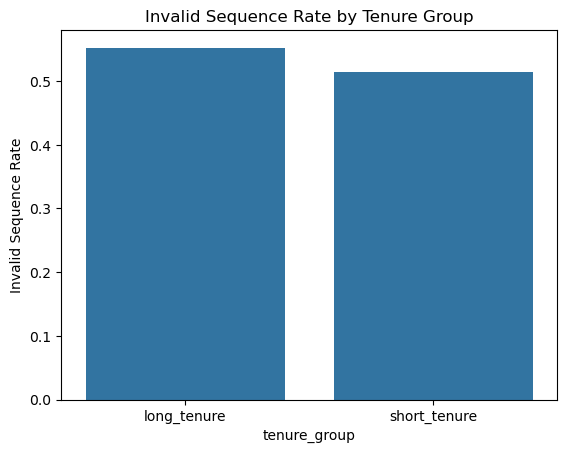

In [50]:
rates = df_sorted.groupby("tenure_group")["invalid_sequence"].mean()

sns.barplot(x=rates.index, y=rates.values)
plt.title("Invalid Sequence Rate by Tenure Group")
plt.ylabel("Invalid Sequence Rate")
plt.show()

In [53]:
# Mark each row as converted (1) if process_step == confirm
invalid_df["converted"] = (invalid_df["process_step"] == "confirm").astype(int)

# Compute median client tenure in months
tenure_median = df_sorted["clnt_tenure_mnth"].median()

# Assign each row to long_tenure or short_tenure
invalid_df["tenure_group"] = np.where(
    invalid_df["clnt_tenure_mnth"] >= tenure_median,
    "long_tenure",
    "short_tenure"
)

user_invalid = (
    invalid_df.groupby(["client_id", "tenure_group", "Variation"])["converted"]
    .max()
    .reset_index()
)

conv_by_tenure_var = (
    user_invalid.groupby(["tenure_group", "Variation"])["converted"]
    .mean()
    .reset_index()
)

print("Conversion rates by tenure × variation:")
display(conv_by_tenure_var)

def ztest_conversion(group_a, group_b, label_a="A", label_b="B"):
    """Runs a 2-proportion z-test and prints the results nicely."""
    count = [group_a.sum(), group_b.sum()]
    nobs  = [len(group_a), len(group_b)]

    z_stat, p_value = proportions_ztest(count, nobs)

    print(f"\nConversion Difference: {label_a} vs {label_b}")
    print("Z-statistic:", z_stat)
    print("P-value:", p_value)

    if p_value < 0.05:
        print("✅ Statistically significant (p < 0.05)")
    else:
        print("❎ Not statistically significant (p ≥ 0.05)")

Conversion rates by tenure × variation:


,tenure_group,Variation,converted
0,long_tenure,control,0.669893
1,long_tenure,test,0.604750
2,short_tenure,control,0.698771
3,short_tenure,test,0.612948


In [54]:
# H1: Compare Short vs Long tenure x Control Group
#_________________________________________________________________________________________

# Filter only Control variation users
control = user_invalid[user_invalid["Variation"].str.lower() == "control"]

# Extract conversion values for short-tenure Control users
short_c = control[control["tenure_group"] == "short_tenure"]["converted"]

# Extract conversion values for long-tenure Control users
long_c  = control[control["tenure_group"] == "long_tenure"]["converted"]

# Run statistical test comparing short vs long tenure within CONTROL
ztest_conversion(short_c, long_c, "Control Short", "Control Long")

#_________________________________________________________________________________________

# H2: Compare Short vs Long tenure x Test Group
#_________________________________________________________________________________________

# Filter only Test variation users
test = user_invalid[user_invalid["Variation"].str.lower() == "test"]

# Conversion values for short-tenure Test users
short_t = test[test["tenure_group"] == "short_tenure"]["converted"]

# Conversion values for long-tenure Test users
long_t  = test[test["tenure_group"] == "long_tenure"]["converted"]

# Run statistical test comparing short vs long tenure within TEST
ztest_conversion(short_t, long_t, "Test Short", "Test Long")

#_________________________________________________________________________________________

# H3: Short-tenure users x Test vs Control
#_________________________________________________________________________________________

# Filter only short-tenure users
short = user_invalid[user_invalid["tenure_group"] == "short_tenure"]

# Short-tenure Control conversions
control_s = short[short["Variation"].str.lower() == "control"]["converted"]

# Short-tenure Test conversions
test_s = short[short["Variation"].str.lower() == "test"]["converted"]

# Compare Test vs Control for SHORT-tenure users
ztest_conversion(test_s, control_s, "Test Short", "Control Short")

#_________________________________________________________________________________________

# H4: Long-tenure users x Test vs Control
#_________________________________________________________________________________________

# Filter only long-tenure users
long = user_invalid[user_invalid["tenure_group"] == "long_tenure"]

# Long-tenure Control conversions
control_l = long[long["Variation"].str.lower() == "control"]["converted"]

# Long-tenure Test conversions
test_l = long[long["Variation"].str.lower() == "test"]["converted"]

# Compare Test vs Control for LONG-tenure users
ztest_conversion(test_l, control_l, "Test Long", "Control Long")


Conversion Difference: Control Short vs Control Long
Z-statistic: 2.795948512864327
P-value: 0.0051747643639588545
✅ Statistically significant (p < 0.05)

Conversion Difference: Test Short vs Test Long
Z-statistic: 0.8481599831387954
P-value: 0.3963488798284128
❎ Not statistically significant (p ≥ 0.05)

Conversion Difference: Test Short vs Control Short
Z-statistic: -8.538420158859541
P-value: 1.3606936203047544e-17
✅ Statistically significant (p < 0.05)

Conversion Difference: Test Long vs Control Long
Z-statistic: -6.434830260722187
P-value: 1.236113879369522e-10
✅ Statistically significant (p < 0.05)


## Conversion Rate Comparison Summary

### **1. Control: Short vs. Long Tenure**
- **Z = 2.80**, **p = 0.005**
- ✅ *Statistically significant difference*  
Long-tenure and short-tenure Control users convert at different rates.

---

### **2. Test: Short vs. Long Tenure**
- **Z = 0.85**, **p = 0.396**
- ❎ *Not statistically significant*  
Tenure does **not** meaningfully affect conversion within the Test variant.

---

### **3. Short-Tenure: Test vs. Control**
- **Z = -8.54**, **p ≈ 1.36e-17**
- ✅ *Statistically significant difference*  
For short-tenure users, the Test and Control variants convert at very different rates.

---

### **4. Long-Tenure: Test vs. Control**
- **Z = -6.43**, **p ≈ 1.24e-10**
- ✅ *Statistically significant difference*  
For long-tenure users, the Test variant also performs differently from Control.

---


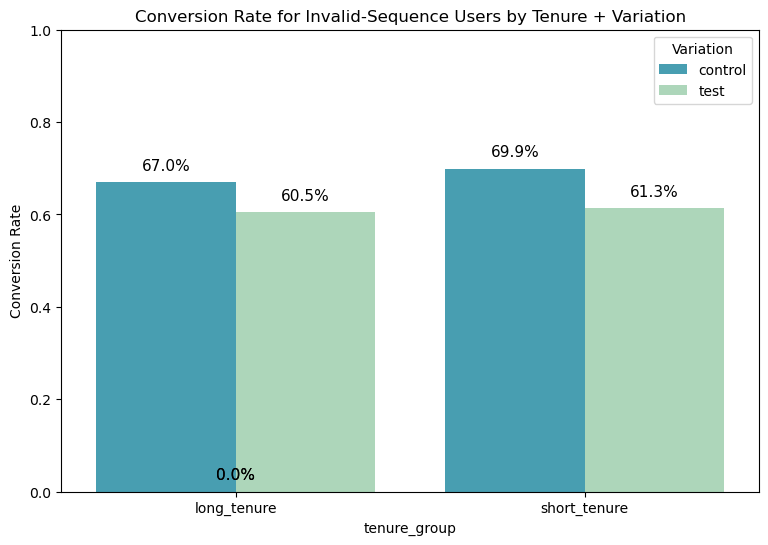

In [64]:
variant_colors = {"control": "#36A9C3", "test": "#A6DDB7"}

plt.figure(figsize=(9, 6))

ax = sns.barplot(
    data=conv_by_tenure_var,
    x="tenure_group",
    y="converted",
    hue="Variation",
    palette=variant_colors,
)

plt.title("Conversion Rate for Invalid-Sequence Users by Tenure + Variation")
plt.ylabel("Conversion Rate")
plt.ylim(0, 1)

# Add % labels above bars
for p in ax.patches:
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2
    ax.text(
        x,
        height + 0.02,
        f"{height*100:.1f}%",
        ha="center",
        va="bottom",
        fontsize=11,
    )

plt.show()

In [56]:
# Filter dataset to invalid-sequence users only

invalid_df = df_sorted[df_sorted["invalid_sequence"] == True].copy()

# Add conversion flag (1 = confirmed)

invalid_df["converted"] = (invalid_df["process_step"] == "confirm").astype(int)

# Aggregate to client-level features for Tableau

invalid_users = (
    invalid_df.groupby("client_id")
    .agg({
        "Variation": "first",
        "visitor_id": "first",
        "tenure_group": "first",
        "clnt_tenure_mnth": "first",
        "clnt_age": "first",
        "gendr": "first",
        "gendr_num": "first",

        # invalid sequence info
        "invalid_sequence": "max",  # always True
        "converted": "max",         # did they ever reach confirm?
        "process_step": ["count", "first", "last"],
    })
)
# Clean column names

invalid_users.columns = [
    "Variation",
    "visitor_id",
    "tenure_group",
    "clnt_tenure_mnth",
    "clnt_age",
    "gendr",
    "gendr_num",
    "invalid_sequence",
    "converted",
    "num_invalid_steps",
    "first_invalid_step",
    "last_invalid_step",
]

# Add invalid rate

total_steps_per_client = df_sorted.groupby("client_id").size()
invalid_step_counts = invalid_df.groupby("client_id").size()

invalid_users["invalid_rate"] = (
    invalid_step_counts / total_steps_per_client
).reindex(invalid_users.index).fillna(0)

# Save dataset

save_path = "/Users/camillascandola/Desktop/ab-testing-project/invalid_users_dataset.csv"

invalid_users.to_csv(save_path, index=True)

print("Saved dataset to:", save_path)
invalid_users.head()

Saved dataset to: /Users/camillascandola/Desktop/ab-testing-project/invalid_users_dataset.csv


,Variation,visitor_id,tenure_group,clnt_tenure_mnth,clnt_age,gendr,gendr_num,invalid_sequence,converted,num_invalid_steps,first_invalid_step,last_invalid_step,invalid_rate
client_id,,,,,,,,,,,,,
722,None,919259913_64837298108,long_tenure,143.0,59.5,F,0.0,True,1,9,start,confirm,1.0
805,None,831412807_82548325803,short_tenure,NaN,NaN,None,NaN,True,0,9,start,step_1,1.0
832,None,645971208_10952400740,short_tenure,NaN,NaN,None,NaN,True,1,7,start,confirm,1.0
1028,control,42237450_62128060588,long_tenure,145.0,36.0,M,1.0,True,0,9,start,step_1,1.0
1197,control,753759429_54481946928,short_tenure,85.0,28.5,U,NaN,True,1,7,start,confirm,1.0
